In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import itertools
from scipy.stats import cumfreq
import math
np.random.seed(664557)

# Gaussian Unit Vectors using Gaussian

In [31]:
t = 160
d = 100
vecs = []
for _ in range(t):
    x = np.random.normal(size=100)
    x /= np.linalg.norm(x)
    vecs.append(x)

In [32]:
dots = []

for combo in itertools.combinations(vecs, 2):
    dots.append(np.dot(combo[0],combo[1]))
    
assert len(dots) == 12720

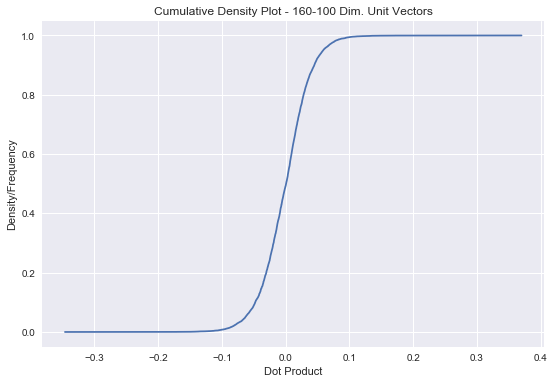

In [33]:
plt.figure(figsize=(9,6))
plt.plot(np.sort(dots), cumfreq(np.sort(dots), numbins=len(dots))[0]/len(dots))
plt.title('Cumulative Density Plot - 160-100 Dim. Unit Vectors')
plt.xlabel('Dot Product')
plt.ylabel('Density/Frequency')
plt.margins(0.05)
plt.savefig('GaussCDF.png')

# Gaussian Unit Vectors using Box-Muller

In [34]:
def box_mull():
    u1, u2 = np.random.uniform(0, 1, 2)
    y1 = (-2*math.log(u1))**.5 * math.cos(2*math.pi*u2)
    y2 = (-2*math.log(u1))**.5 * math.sin(2*math.pi*u2)
    return y1, y2

vecs = []

for _ in range(t):
    boxes = []
    for i in range(d//2):
        box_pair = box_mull()
        boxes.extend(box_pair)
        
    assert len(boxes) == d
    
    vecs.append(np.array(boxes)/np.linalg.norm(boxes))

In [35]:
dots1 = []

for combo in itertools.combinations(vecs, 2):
    dots1.append(np.dot(combo[0],combo[1]))
    
assert len(dots1) == 12720

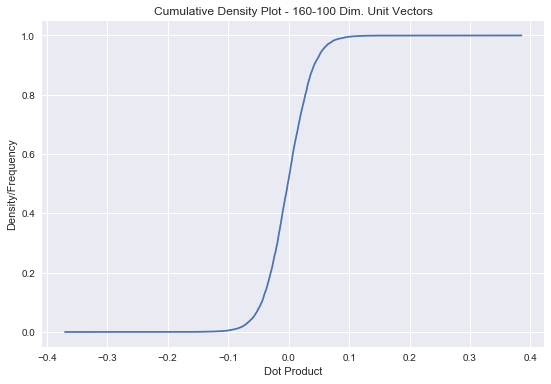

In [36]:
plt.figure(figsize=(9,6))
plt.plot(np.sort(dots1), cumfreq(np.sort(dots1), numbins=len(dots1))[0]/len(dots1))
plt.title('Cumulative Density Plot - 160-100 Dim. Unit Vectors')
plt.xlabel('Dot Product')
plt.ylabel('Density/Frequency')
plt.margins(0.05)
plt.savefig('BoxCDF.png')

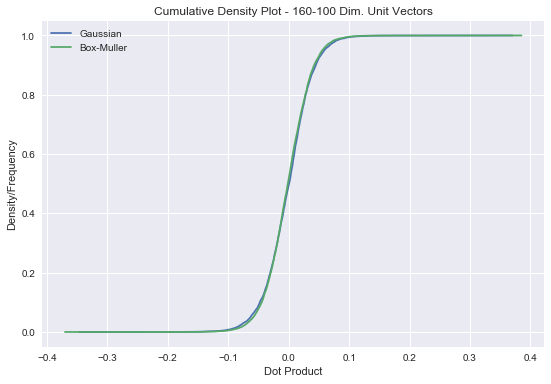

In [37]:
plt.figure(figsize=(9,6))
plt.plot(np.sort(dots), cumfreq(np.sort(dots), numbins=len(dots))[0]/len(dots), label="Gaussian")
plt.plot(np.sort(dots1), cumfreq(np.sort(dots1), numbins=len(dots1))[0]/len(dots1), label="Box-Muller")
plt.title('Cumulative Density Plot - 160-100 Dim. Unit Vectors')
plt.xlabel('Dot Product')
plt.ylabel('Density/Frequency')
plt.margins(0.05)
plt.legend()
plt.savefig('ComboUnitVec.png')

# Choosing $r,b$

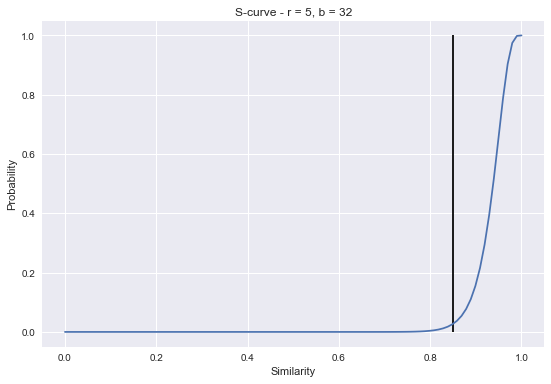

In [16]:
func = lambda s, r, b : 1-(1-s**b)**r

sims = [0.75,0.25,0.35,0.1,0.45,0.92]

b = 32
r = 5

plt.figure(figsize=(9,6))
s = np.linspace(0,1,100)
plt.plot(s, func(s, r, b))
plt.vlines(0.85, 0, 1)
plt.title('S-curve - r = {}, b = {}'.format(r,b))
plt.xlabel('Similarity')
plt.ylabel('Probability')
plt.margins(0.05)
#plt.show()
plt.savefig('Figure_2.png')

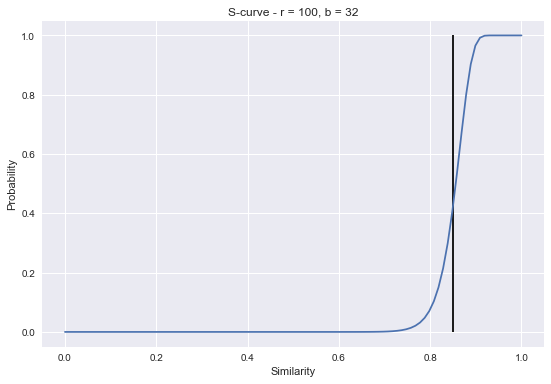

In [23]:
b = 32
r = 100

plt.figure(figsize=(9,6))
s = np.linspace(0,1,100)
plt.plot(s, func(s, r, b))
plt.vlines(0.85, 0, 1)
plt.title('S-curve - r = {}, b = {}'.format(r,b))
plt.xlabel('Similarity')
plt.ylabel('Probability')
plt.margins(0.05)
plt.savefig('Figure_1.png')

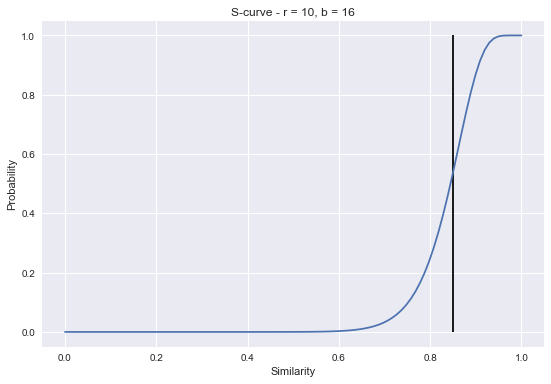

In [24]:
b = 16
r = 10

plt.figure(figsize=(9,6))
s = np.linspace(0,1,100)
plt.plot(s, func(s, r, b))
plt.vlines(0.85, 0, 1)
plt.title('S-curve - r = {}, b = {}'.format(r,b))
plt.xlabel('Similarity')
plt.ylabel('Probability')
plt.margins(0.05)
plt.savefig('Figure_3.png')

In [25]:
print(func(np.array(sims), r, b))

[9.58243199e-02 2.32830644e-09 5.07094162e-07 1.11022302e-15
 2.82744844e-05 9.52972184e-01]
